In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 192 entries, Province/State to 7/27/20
dtypes: float64(2), int64(188), object(2)
memory usage: 399.1+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 192 entries, Province/State to 7/27/20
dtypes: float64(2), int64(188), object(2)
memory usage: 399.1+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


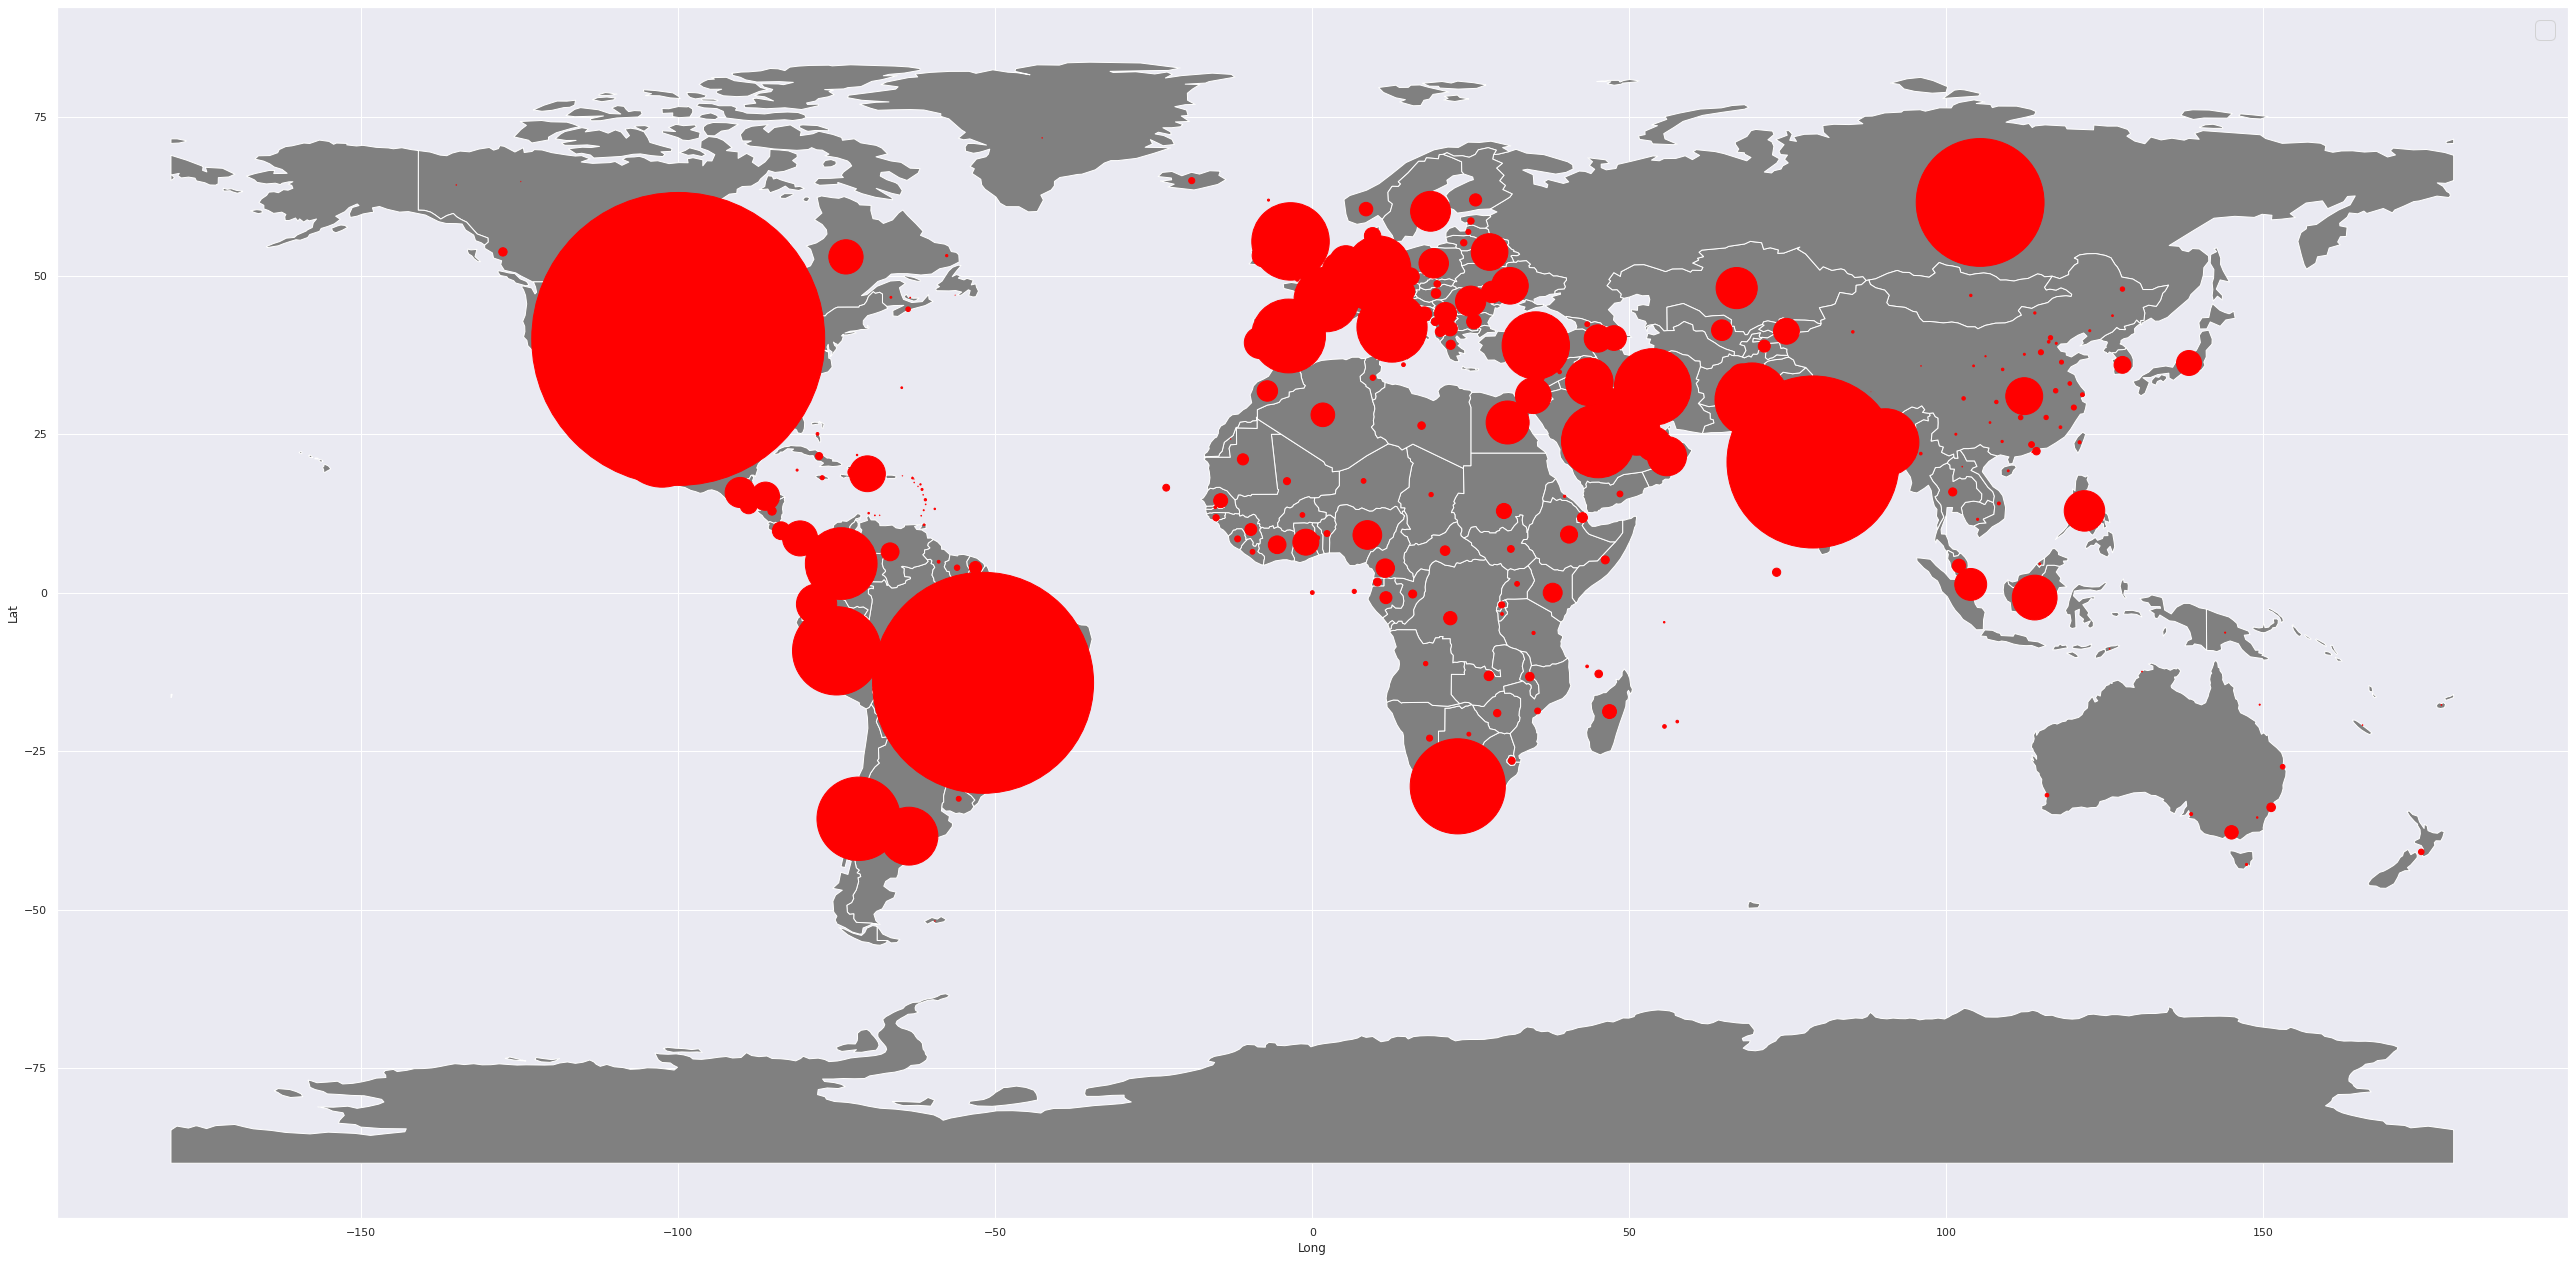

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/23/20,3448,1233269,197842,150376,189140,80297,1620313,12817,80600,940
7/24/20,3505,1261624,198192,150376,189696,80341,1693214,12866,80943,946
7/25/20,3640,1279414,198320,150376,189919,80409,1785359,12890,80945,947
7/26/20,3736,1297863,198446,150376,190055,80459,1812913,12905,80945,948


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/23/20,13129,56817,42192,3439,13377,36902,57615,821,141,2466
7/24/20,13669,57993,43283,3439,13792,37559,59077,831,142,2469
7/25/20,14600,58864,44492,3439,14221,38438,60896,837,147,2478
7/26/20,15229,60296,45053,3439,14630,39276,62908,842,147,2495


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/23/20,80,1209,1632,108,372,1011,1006,10,8,87
7/24/20,87,1250,1669,108,379,1061,1036,10,8,87
7/25/20,98,1275,1699,108,390,1098,1055,10,8,87
7/26/20,104,1294,1734,108,400,1116,1063,10,8,87


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/23/20,13129,56817,42192,3439,13377,36902,57615,821,141,2466
7/24/20,13669,57993,43283,3439,13792,37559,59077,831,142,2469
7/25/20,14600,58864,44492,3439,14221,38438,60896,837,147,2478
7/26/20,15229,60296,45053,3439,14630,39276,62908,842,147,2495


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/23/20,80,1209,1632,108,372,1011,1006,10,8,87
7/24/20,87,1250,1669,108,379,1061,1036,10,8,87
7/25/20,98,1275,1699,108,390,1098,1055,10,8,87
7/26/20,104,1294,1734,108,400,1116,1063,10,8,87


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
7/23/20,1.062131,1.016295,1.025696,1.0,1.030983,1.022159,1.028050,1.006127,1.000000,1.001625
7/24/20,1.041130,1.020698,1.025858,1.0,1.031023,1.017804,1.025375,1.012180,1.007092,1.001217
7/25/20,1.068110,1.015019,1.027932,1.0,1.031105,1.023403,1.030790,1.007220,1.035211,1.003645
7/26/20,1.043082,1.024327,1.012609,1.0,1.028760,1.021801,1.033040,1.005974,1.000000,1.006860


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,76,76,76,76,76,82,82,82,86,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,153,174,194,219,274,316,326,342,382,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,105,106,106,106,106,108,108,110,110,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1067,1067,1067,1067,1067,1067,1067,1067,1067,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,197278,204005,211038,218428,226373,233541,240795,240795,257101,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,11114,11534,11811,12361,13129,13669,14600,15229,15841,POINT (-83.75340 9.74890)
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2446,2446,2449,2462,2466,2469,2478,2495,2532,POINT (-77.78117 21.52176)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,52855,53956,54797,56043,57615,59077,60896,62908,64156,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,11846,12207,12582,12975,13377,13792,14221,14630,15035,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,6655,6745,6851,6883,7086,7251,7332,7332,7514,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,76,76,76,76,76,82,82,82,86,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,153,174,194,219,274,316,326,342,382,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,105,106,106,106,106,108,108,110,110,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,11114,11534,11811,12361,13129,13669,14600,15229,15841,POINT (-83.75340 9.74890)
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2446,2446,2449,2462,2466,2469,2478,2495,2532,POINT (-77.78117 21.52176)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,52855,53956,54797,56043,57615,59077,60896,62908,64156,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,11846,12207,12582,12975,13377,13792,14221,14630,15035,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,6655,6745,6851,6883,7086,7251,7332,7332,7514,POINT (-53.12580 3.93390)
114,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,46,46,46,46,46,46,49,49,49,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,38677,39039,40229,41135,42192,43283,44492,45053,45309,POINT (-90.23080 15.78350)


In [38]:
len(temp)

22

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'7/26/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,7/26/20,7/27/20
0,NaN,Dominican Republic,62908,64156
1,NaN,Panama,60296,61442
2,NaN,Guatemala,45053,45309
3,NaN,Honduras,39276,39741
4,NaN,Costa Rica,15229,15841
5,NaN,El Salvador,14630,15035
6,French Guiana,France,7332,7514
7,NaN,Haiti,7315,7340
8,NaN,Nicaragua,3439,3439
9,NaN,Cuba,2495,2532


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,63,63,63,63,63,63,63,63,63,63
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,6516,6736,6929,7166,7373,7688,7975,8269,8269,8777
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,54,62,66,68,71,80,87,98,104,115
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,971,981,993,999,1005,1006,1036,1055,1063,1083
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,324,335,344,352,363,372,379,390,400,408
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,37,37,38,39,39,40,41,41,41,42


In [49]:
temp_deaths.drop([41,82,109,113,115,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,54,62,66,68,71,80,87,98,104,115
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,971,981,993,999,1005,1006,1036,1055,1063,1083
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,324,335,344,352,363,372,379,390,400,408
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,37,37,38,39,39,40,41,41,41,42
114,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,1449,1485,1502,1531,1573,1632,1669,1699,1734,1761


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'7/26/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,7/26/20,7/27/20
0,NaN,Guatemala,1734,1761
1,NaN,Panama,1294,1322
2,NaN,Honduras,1116,1166
3,NaN,Dominican Republic,1063,1083
4,NaN,El Salvador,400,408
5,NaN,Haiti,157,158
6,NaN,Costa Rica,104,115
7,NaN,Nicaragua,108,108
8,NaN,Cuba,87,87
9,French Guiana,France,41,42


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,57,57,57,57,58,58,60,60,60,65
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,91,91,91,91,94,94,94,94,94,94
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,22,22,22,22,23,25,26,26,26,26
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,85836,91793,95804,98840,101613,107951,113864,119667,119667,131161
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2902,2966,3019,3194,3322,3448,3505,3640,3736,3824
80,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2304,2308,2308,2321,2326,2339,2341,2345,2349,2351
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,24607,25094,25561,25976,26466,26905,27625,27980,28603,30204
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,6560,6705,6831,6965,7119,7276,7415,7549,7648,7778


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,57,57,57,57,58,58,60,60,60,65
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,91,91,91,91,94,94,94,94,94,94
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,2902,2966,3019,3194,3322,3448,3505,3640,3736,3824
80,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2304,2308,2308,2321,2326,2339,2341,2345,2349,2351
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,24607,25094,25561,25976,26466,26905,27625,27980,28603,30204
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,6560,6705,6831,6965,7119,7276,7415,7549,7648,7778
99,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,4272,4272,4714,4996,5277,5376,5522,5767,5767,6047
107,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,39,39,39,39,39,39,39,41,41,41
116,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,23365,23365,25539,26685,27756,28856,30150,31045,31612,32455


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'7/26/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,7/26/20,7/27/20
0,NaN,Panama,34131,35086
1,NaN,Guatemala,31612,32455
2,NaN,Dominican Republic,28603,30204
3,NaN,El Salvador,7648,7778
4,French Guiana,France,5767,6047
5,NaN,Honduras,4922,5039
6,NaN,Haiti,4365,4365
7,NaN,Costa Rica,3736,3824
8,NaN,Nicaragua,2492,2492
9,NaN,Cuba,2349,2351


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,76,76,76,76,76,76,82,82,82,86
1,Bahamas,0,0,0,0,0,0,0,0,0,...,138,153,174,194,219,274,316,326,342,382
2,Barbados,0,0,0,0,0,0,0,0,0,...,104,105,106,106,106,106,108,108,110,110
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,10551,11114,11534,11811,12361,13129,13669,14600,15229,15841
4,Cuba,0,0,0,0,0,0,0,0,0,...,2445,2446,2446,2449,2462,2466,2469,2478,2495,2532
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,51519,52855,53956,54797,56043,57615,59077,60896,62908,64156
6,El Salvador,0,0,0,0,0,0,0,0,0,...,11508,11846,12207,12582,12975,13377,13792,14221,14630,15035
7,French Guiana,0,0,0,0,0,0,0,0,0,...,6655,6655,6745,6851,6883,7086,7251,7332,7332,7514
8,St Martin,0,0,0,0,0,0,0,0,0,...,46,46,46,46,46,46,46,49,49,49
9,Guatemala,0,0,0,0,0,0,0,0,0,...,38042,38677,39039,40229,41135,42192,43283,44492,45053,45309


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,54,62,66,68,71,80,87,98,104,115
4,Cuba,0,0,0,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,971,981,993,999,1005,1006,1036,1055,1063,1083
6,El Salvador,0,0,0,0,0,0,0,0,0,...,324,335,344,352,363,372,379,390,400,408
7,French Guiana,0,0,0,0,0,0,0,0,0,...,37,37,38,39,39,40,41,41,41,42
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,1449,1485,1502,1531,1573,1632,1669,1699,1734,1761


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,57,57,57,57,58,58,60,60,60,65
1,Bahamas,0,0,0,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
2,Barbados,0,0,0,0,0,0,0,0,0,...,91,91,91,91,94,94,94,94,94,94
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,2902,2966,3019,3194,3322,3448,3505,3640,3736,3824
4,Cuba,0,0,0,0,0,0,0,0,0,...,2304,2308,2308,2321,2326,2339,2341,2345,2349,2351
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,24607,25094,25561,25976,26466,26905,27625,27980,28603,30204
6,El Salvador,0,0,0,0,0,0,0,0,0,...,6560,6705,6831,6965,7119,7276,7415,7549,7648,7778
7,French Guiana,0,0,0,0,0,0,0,0,0,...,4272,4272,4714,4996,5277,5376,5522,5767,5767,6047
8,St Martin,0,0,0,0,0,0,0,0,0,...,39,39,39,39,39,39,39,41,41,41
9,Guatemala,0,0,0,0,0,0,0,0,0,...,23365,23365,25539,26685,27756,28856,30150,31045,31612,32455


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(150, 22)

In [75]:
recovered_camcar_all.shape

(150, 22)

In [76]:
deaths_camcar_all.shape

(150, 22)

In [77]:
active_camcar_all.shape

(150, 22)